# **CHURN PREDICTION**

**Churn** adalah:


1.  seberapa besar persentase jumlah akun yang membatalkan atau tidak meneruskan langganan
2.   seberapa banyak jumlah pelanggan yang berhenti menggunakan produk
3. besarnya kemungkinan seorang pelanggan akan berhenti menggunakan produk

Dievaluasi dalam **suatu periode waktu yang spesifik** (bulanan, kuartal, tahunan).

Churn Rate yang tinggi dapat **berdampak buruk terhadap bisnis** dan dapat menunjukkan **ketidakpuasan**.

**Churn Rate** = (Jumlah pelanggan di awal periode - Jumlah pelanggan di akhir periode) / Jumlah pelanggan di awal periode

**Tantangan**

Teknik pemodelan prediksi churn berusaha **memahami perilaku dan atribut pelanggan yang menandakan risiko dan waktu pelanggan pergi**. Dari hal tersebut terdapat beberapa tantangan, di antaranya:

1. kesulitan mendapatkan data
2. keakuratan teknik
3. adanya resiko dimana insentif khusus yang berfokus pada retensi dapat diberikan kepada pelanggan aktif yang tidak churn
4. model churn prediction harus mengandalkan data real-time

#Membaca Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mengenal Data

Dataset terdiri dari beberapa fitur, sebagai berikut:
- RowNumber : Nomor urut data
- CustomerId : Nomor ID dari customer
- Surname : Nama belakang customer
- CreditScore : Skor kredit dari customer (semakin tinggi nilainya maka mengidentifikasikan seorang customer sering berinteraksi dengan bank/layanannya)
- Geography : Negara domisili customer
- Gender : Jenis kelamin customer
- Age : Umur customer
- Tenure : Waktu seorang customer menjadi pelanggan bank (tahun)
- Balance : Saldo yang dimiliki oleh customer
- NumOfProducts : Jumlah produk atau layanan bank yang dimiliki oleh customer
- HasCrCard : Identifikasi customer perihal kepemilikan kartu kredit
- IsActiveMember : Identifikasi customer perihal status aktif sebagai member
- EstimatedSalary : Gaji dari customer terkait
- Exited : Identifikasi customer apakah churn atau tidak (1 - Churn, 0 - Non Churn)

In [4]:
df = pd.read_csv('/content/drive/MyDrive/DIGITAL_SKOLA/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.shape

(10000, 14)

In [6]:
#cek missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
#deskripsi statistikal data numerik
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


1. Credit Score
- Max = 850, Min = 350, Rata-rata = 650
2. Umur (tahun)
- Max = 92, Min = 18, Rata-rata = 39
3. Tenure (tahun)
- Max = 10, Min = 0, Rata-rata = 5
4. Number of Products
- Max = 4, Min = 1, Rata-rata = 2
5. Has Credit Card
- 70% customer memiliki Credit Card
6. Is Active Member
- 51% customer adalah member aktif
7. Estimated Salary
- Max = 199992.48, Min = 11.58, Rata-rata = 100090.24
8. Exited
- 20% customer churn

In [8]:
#deskripsi statistikal data kategorikal
df.describe(include = 'object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


- Customer / nasabah tersebar di 3 negara dan terbanyak adalah di Prancis yaitu sebanyak 5014 nasabah
- Customer laki-laki lebih banyak dibandingkan wanita yaitu sebanyak 5457 nasabah

In [9]:
#menghapus kolom yang tidak digunakan dalam prediksi
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis

## Features Vs Target

### Categorical Features

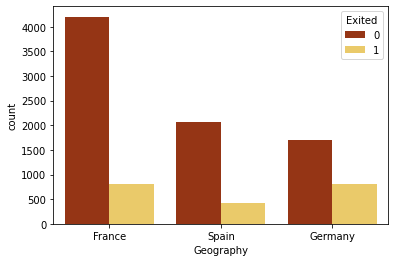

In [10]:
#Geography vs Exited
sns.countplot(x = 'Geography', hue = 'Exited', data = df, palette = 'afmhot')
plt.show()

Dari plot di atas, pola churn atau tidaknya seorang nasabah tidak terlalu terlihat. Namun, secara proporsional dapat dilihat bahwa di Jerman untuk perbandingan churn dan non churn cukup terlihat, yaitu churn sekitar 30% nasabah di negara tersebut. Untuk nasabah churn terbanyak ada di negara Prancis. Dan untuk di negara Spanyol nasabah cukup stabil, tingkat churn tidak begitu besar.

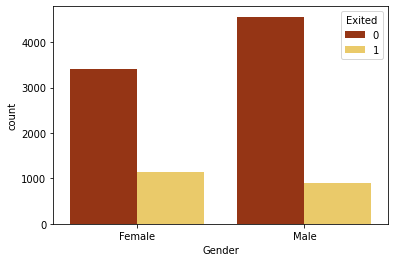

In [11]:
#Gender vs Exited
sns.countplot(x = 'Gender', hue = 'Exited', data = df, palette = 'afmhot')
plt.show()

Plot di atas memberikan informasi bahwa secara proporsional nasabah churn terbanyak adalah wanita.

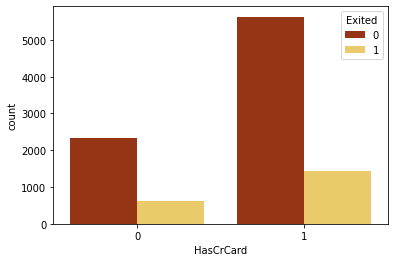

In [12]:
#HasCrCard vs Exited
sns.countplot(x = 'HasCrCard', hue = 'Exited', data = df, palette = 'afmhot')
plt.show()

Dari plot di atas dapat dilihat pola yang jelas bahwa nasabah yang memiliki credit card (kategori 1) justru yang lebih banyak churn.

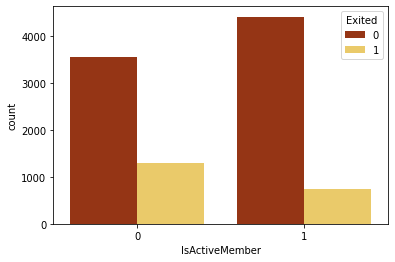

In [13]:
#IsActiveMember vs Exited
sns.countplot(x = 'IsActiveMember', hue = 'Exited', data = df, palette = 'afmhot')
plt.show()

Active Member biasanya diidentifikasi dari waktu terakhir seorang nasabah melakukan transaksi, apabila lebih dari 3 bulan tidak bertransaksi maka dianggap tidak aktif (kategori 0). Dari plot di atas terlihat pola yang jelas bahwa nasabah yang churn kebanyakan adalah nasabah yang dianggap tidak aktif. Untuk nasabah aktif namun churn, kemungkinan nasabah tersebut baru saja churn.

### Numerical Features

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


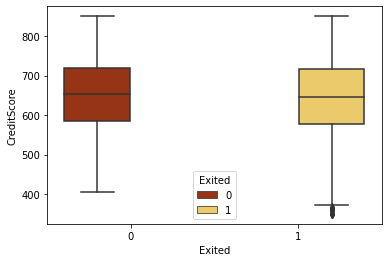

In [15]:
#CreditScore vs Rxited
sns.boxplot(y = 'CreditScore', x = 'Exited', hue = 'Exited', data = df, palette = 'afmhot')
plt.show()

Boxplot di atas menunjukkan bahwa antara nasabah yang churn atau tidak berdasarkan credit score memiliki distribusi yang kurang lebih sama, sehingga polanya kurang unik. Namun, boxplot di atas memberikan informasi bahwa beberapa nasabah yang churn memiliki credit score yang kecil (< 400), yang berarti nasabah tersebut memang memiliki intensitas aktifitas yang jarang dengan layanan bank.

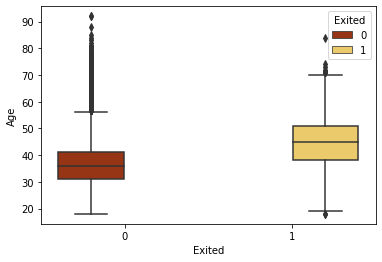

In [16]:
#Age vs Exited
sns.boxplot(y = 'Age', x = 'Exited', hue = 'Exited', data = df, palette = 'afmhot')
plt.show()

Dari boxplot di atas dapat dilihat bahwa nasabah yang berusia 40-50 tahun lebih banyak yang churn, sedangkan yang tidak churn berada di kisaran umur 30-40 tahun. 

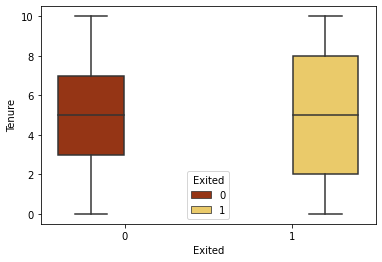

In [17]:
#Tenure vs Exited
sns.boxplot(y = 'Tenure', x = 'Exited', hue = 'Exited', data = df, palette = 'afmhot')
plt.show()

Boxplot di atas menunjukkan bahwa dari keterkaitan fitur Tenure dan Exited kurang memiliki pola yang menarik.

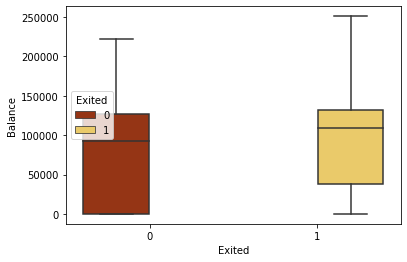

In [18]:
#Balance vs Exited
sns.boxplot(y = 'Balance', x = 'Exited', hue = 'Exited', data = df, palette = 'afmhot')
plt.show()

Dari boxplot di atas menunjukkan bahwa nasabah dengan balance > 50000 cenderung churn. Kemungkinan, nasabah tersebut churn karena merasa sudah tidak lagi membutuhkan layanan dari bank.

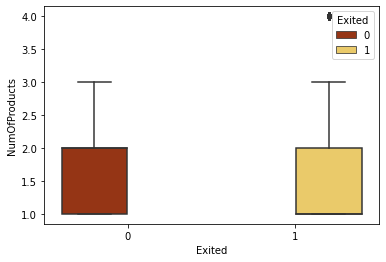

In [19]:
#NumOfProducts vs Exited
sns.boxplot(y = 'NumOfProducts', x = 'Exited', hue = 'Exited', data = df, palette = 'afmhot')
plt.show()

Boxplot di atas memperlihatkan pola yang kurang menarik untuk keterkaitan fitur Number of Products dengan Exited. Namun, dapat dilihat pula terdapat beberapa nasabah yang memiliki 4 produk/layanan yang justru churn.

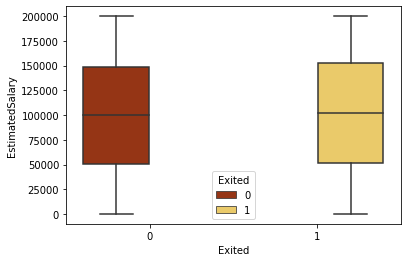

In [20]:
#EstimatedSalary vs Exited
sns.boxplot(y = 'EstimatedSalary', x = 'Exited', hue = 'Exited', data = df, palette = 'afmhot')
plt.show()

Boxplot di atas juga tidak menunjukkan pola yang menarik untuk keterkaitan fitur Estimated Salary dengan Exited. Hal ini dikarenakan distribusi antara nasabah yang churn dan yang tidak churn memiliki pola distribusi yang hampir sama.

## Cek Korelasi

In [21]:
#korelasi Pearson antar fitur
corr = df.corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


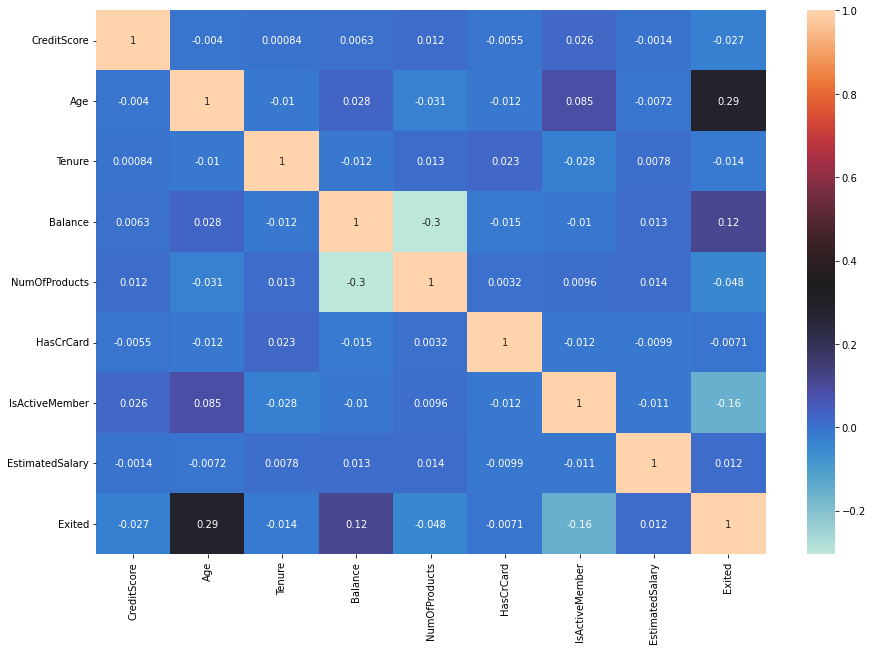

In [22]:
#cek korelasi menggunakan heatmap agar lebih mudah dibaca
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = 'icefire')
plt.show()

Dari peta korelasi di atas dapat dilihat beberapa fitur yang memiliki korelasi cukup tinggi dengan fitur target yaitu Exited (churn atau tidaknya seorang nasabah). Fitur yang memiliki korelasi terbesar dengan target adalah **Age** yaitu sebesar **0.29**, kemudian fitur **Balance** sebesar **0.12** dan fitur **IsActiveMember** (aktif atau tidaknya seorang nasabah) yaitu sebesar **-0.16**.

Age dan Balance memiliki nilai korelasi positif terhadap fitur target Exited, yang berarti semakin tinggi umur nasabah dan semakin besar nominal Balance maka akan semakin besar kemungkinan untuk melakukan churn.

Sedangkan, untuk fitur IsActiveMember memiliki nilai korelasi negatif terhadap fitur target Exited yang berarti apabila nilai IsActiveMember semakin kecil atau mendekati nol (mengindikasikan bahwa bukan nasabah aktif) maka justru kemungkinan untuk melakukan churn akan lebih tinggi.

## Target Distribution

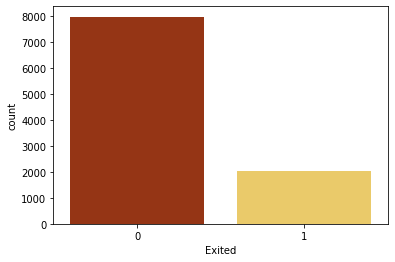

In [23]:
#cek distribusi dari fitur target Exited
sns.countplot(x='Exited', data=df, palette = 'afmhot')
plt.show()

In [24]:
#menghitung persentase jumlah nasabah yang churn dan tidak churn
df['Exited'].value_counts()*100/len(df)

0    79.63
1    20.37
Name: Exited, dtype: float64

Secara proporsional data terlihat imbalance. Namun, dengan persentase sebesar 20% masih dapat dikatakan aman tanpa melakukan resampling. Untuk selanjutnya akan melakukan modeling tanpa resampling terlebih dahulu. Hal ini dikarenakan resampling dilakukan apabila performa model buruk jika tidak melakukakan resampling terhadap imbalance data.

# Feature Engineering

In [25]:
#lakuakan copy dataset agar dataset awal bisa langsung dibaca/dipanggil tanpa membaca dari awal
dff = df.copy()

In [26]:
dff.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## New Feature

In [27]:
#hubungan antara credit score dan age
#misal, apabila credit score dibagi umur menghasilkan nilai yang tinggi
#maka dapat dikatakan bahwa nasabah tersebut muda dan aktif berinteraksi dengan layanan bank
dff['CreditScoreGivenAge'] = dff['CreditScore'] / dff['Age']

#hubungan antara tenure dengan age
#seberapa setia/loyal seorang nasabah jika distandarisasi dengan tahun
#karena tenure adalah jangka waktu nasabah menggunakan layanan
dff['TenureByAge'] = dff['Tenure'] / dff['Age']

#hubungan antara balance dengan salary
#apabila balance dibagi estimated salary menghasilkan nilai tinggi maka dianggap nasabah tersebut percaya pada bank
#dan sebaliknya
dff['BalanceSalaryRatio'] = dff['Balance'] / dff['EstimatedSalary']

In [28]:
dff.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreGivenAge,TenureByAge,BalanceSalaryRatio
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,14.738095,0.047619,0.000000
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14.829268,0.024390,0.744677
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,11.952381,0.190476,1.401375
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,17.923077,0.025641,0.000000
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,19.767442,0.046512,1.587055


## New Features vs Target

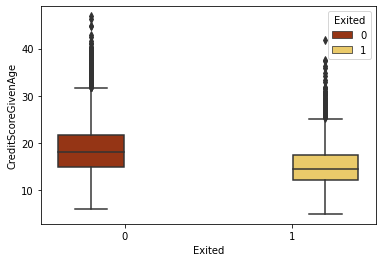

In [29]:
#CreditScoreGivenAge vs Exited
sns.boxplot(y = 'CreditScoreGivenAge', x = 'Exited', hue = 'Exited', data = dff, palette = 'afmhot')
plt.show()

Boxplot menunjukkan bahwa nasabah yang churn memiliki CreditScoreGivenAge yang kecil, yang berarti credit score dibandingkan dengan umurnya adalah kecil (nasabah yang kurang loyal).

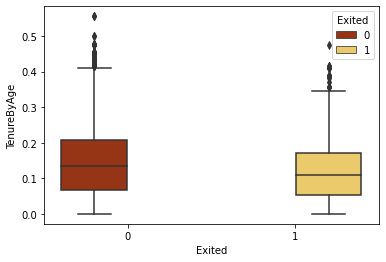

In [30]:
#TenureByAge vs Exited
sns.boxplot(y = 'TenureByAge', x = 'Exited', hue = 'Exited', data = dff, palette = 'afmhot')
plt.show()

Dari boxplot di atas bahwa fitur ini kurang memberikan pola yang menarik.

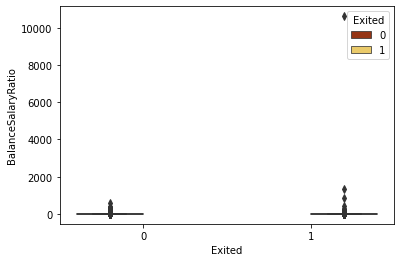

In [31]:
#BalanceSalaryRatio vs Exited
sns.boxplot(y = 'BalanceSalaryRatio', x = 'Exited', hue = 'Exited', data = dff, palette = 'afmhot')
plt.show()

Ditemukan hal yang menarik dari boxplot di atas, dimana terdapat outlier di nasabah yang churn yaitu nasabah dengan estimated salary tinggi namun justru churn.

## Data Preparation

In [32]:
#copy dataset dari dataset yang sudah melalui step feature engineering
df_prep = dff.copy()

### One Hot Encoding

In [33]:
#import library
from sklearn.preprocessing import OneHotEncoder

#variabel untuk memasukkan fitur yang akan diaplikasikan ke one hot encoding
string_feat = ['Geography', 'Gender']

#call OneHotEncoder function
ohe = OneHotEncoder()

#fit untuk melatih OneHotEncoder membaca data terlebih dahulu
#agar ohe tau kolom mana yang akan diaplikasikan dan label apa saja yang akan dipecah
ohe.fit(df_prep[string_feat])

#hasil one hot encoding akan ditransform (dataframe baru)
#kolom baru akan diambil dari hasil
dff_ohe_result = pd.DataFrame(ohe.transform(df_prep[string_feat]).toarray(),
                              columns=ohe.get_feature_names_out())

#menggabungkan hasil one hot encoding ke dataset
df_prep = pd.concat([df_prep, dff_ohe_result], axis=1)

#menghapus kolom yang diaplikasikan one hot encoding Geography dan Gender
#karena sudah digantikan dengan kolom baru hasil One Hot Encoding
df_prep = df_prep.drop(columns=string_feat)

df_prep.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreGivenAge,TenureByAge,BalanceSalaryRatio,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,14.738095,0.047619,0.000000,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,14.829268,0.024390,0.744677,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,11.952381,0.190476,1.401375,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,17.923077,0.025641,0.000000,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,19.767442,0.046512,1.587055,0.0,0.0,1.0,1.0,0.0


In [34]:
#hasil dari one hot encoding
#dff_ohe_result

### Normalization

In [35]:
#semua nilai di dataset akan diubah ke skala yang sama yaitu 0 - 1
#import library
from sklearn.preprocessing import MinMaxScaler

#call MinMaxScaler function
mm = MinMaxScaler()

#fit function
mm.fit(df_prep)

#menerapkan kolom hasil normalisasi ke dataset
df_prep = pd.DataFrame(mm.transform(df_prep), columns = df_prep.columns)
df_prep.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreGivenAge,TenureByAge,BalanceSalaryRatio,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.235083,0.085714,0.000000,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.237252,0.043902,0.000070,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.168807,0.342857,0.000132,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.310859,0.046154,0.000000,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.354739,0.083721,0.000150,0.0,0.0,1.0,1.0,0.0


### Split Data

In [36]:
#import library
from sklearn.model_selection import train_test_split

#mendefinisikan variabel x (independent) dan y(dependent / target)
x = df_prep.drop(columns=['Exited']).copy()
y = df_prep['Exited'].copy()

#rasio yang digunakan 75:25 dan gunakan random_state agar nilai saat random selalu sama
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 25)

In [37]:
#cek komposisi data train dan test
print(x_train.shape)
print(x_test.shape)

(7500, 16)
(2500, 16)


# Modeling

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

## Logistic Regression

In [40]:
#fit model Logistic Regression
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [41]:
#cek akurasi model antara data training dan data test untuk melihat apakah model overfitting
print('Training Accuracy: ', metrics.accuracy_score(y_train, log.predict(x_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y_test, log.predict(x_test))*100)

Training Accuracy:  81.28
Test Accuracy:  81.76


Dari hasil tes akurasi model, terlihat perbedaan antara keduanya tidak begitu besar yang berarti model tidak overfitting.

### Hyperparameter Tuning

Walaupun model tidak overfitting, Hyperparameter Tuning tetap dilakukan untuk membuat model lebih akurat.

In [42]:
#import library
from sklearn.model_selection import GridSearchCV

#creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

#instantiating logistic regression classifier
log1 = LogisticRegression(max_iter = 1000)

#instantiating the GridSearchCV object
#cv - cross validation
log1_cv = GridSearchCV(log1, param_grid, cv = 25)

log1_cv.fit(x_train, y_train)

#print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(log1_cv.best_params_))
print("Best score is {}".format(log1_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 19306.977288832535}
Best score is 0.8161333333333333


In [43]:
#fit Logistic Regression model after hyperparameter tuning
log_model = LogisticRegression(max_iter = 1000, C = 19306.977288832535)
log_model.fit(x_train, y_train)

LogisticRegression(C=19306.977288832535, max_iter=1000)

In [44]:
#accuracy checking on new logistic regression model
print('Training Accuracy: ', metrics.accuracy_score(y_train, log_model.predict(x_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y_test, log_model.predict(x_test))*100)

Training Accuracy:  81.6
Test Accuracy:  81.88


Akurasi model meningkat setelah dilakukan hyperparameter tuning walaupun tidak signifikan. Selain itu, model juga tetap tidak overfitting.

## Support Vector Classifier (SVC)

In [45]:
#fit model Support Vector Classifier
svc = SVC(probability = True)
svc.fit(x_train, y_train)

SVC(probability=True)

In [46]:
#cek akurasi model antara data training dan data test untuk melihat apakah model overfitting
print('Training Accuracy: ', metrics.accuracy_score(y_train, svc.predict(x_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y_test, svc.predict(x_test))*100)

Training Accuracy:  83.78666666666666
Test Accuracy:  84.11999999999999


Cek akurasi model menunjukkan model tidak mengalami overfitting, terlihat dari perbedaan nilai akurasi antara training dan test. Namun, perlu dicoba melakukan hyperparameter tuning agar model lebih akurat.

### Hyperparameter Tuning

Mencari nilai parameter yang optimal untuk model agara akurasinya meningkat.

In [47]:
#import library
from sklearn.model_selection import GridSearchCV

#creating the hyperparameter grid
param_grid = {'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'C': [0.1, 1, 10, 100, 1000],
              'kernel': ['rbf']}

#instantiating SVC classifier
svc1 = SVC(probability = True)

#instantiating the GridSearchCV object
svc1_cv = GridSearchCV(svc1, param_grid, refit = True, verbose = 3)

svc1_cv.fit(x_train, y_train)

#print the tuned parameters and score
print("Tuned Support Vector Classifier Parameters: {}".format(svc1_cv.best_params_))
print("Best score is {}".format(svc1_cv.best_score_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.794 total time=   7.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.795 total time=   6.8s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.793 total time=   6.8s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.793 total time=   6.8s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.793 total time=   6.9s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.793 total time=   6.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.793 total time=   6.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.793 total time=   6.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.793 total time=   6.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.793 total time=   6.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.793 total time=   5.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [48]:
#fit Support Vector Classifier model after hyperparameter tuning
#rbf adalah default kernel untuk SVC
svc_model = SVC(C=100, gamma=0.1, probability=True)
svc_model.fit(x_train, y_train)

SVC(C=100, gamma=0.1, probability=True)

In [49]:
#accuracy checking on new SVC model
print('Training Accuracy: ', metrics.accuracy_score(y_train, svc_model.predict(x_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y_test, svc_model.predict(x_test))*100)

Training Accuracy:  85.84
Test Accuracy:  86.08


Setelah dilakukan hyperparameter tuning, model pada training dan test keduanya meningkat akurasinya sekitar 2%.

## Random Forest

In [50]:
#fit model Random Forest
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [51]:
#cek akurasi model antara data training dan data test untuk melihat apakah model overfitting
print('Training Accuracy: ', metrics.accuracy_score(y_train, rf.predict(x_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y_test, rf.predict(x_test))*100)

Training Accuracy:  99.98666666666666
Test Accuracy:  86.44


Setelah dilakukan cek akurasi model, terlihat jelas bahwa model overfit. Maka dari itu perlu dilakukan evaluasi untuk mengetahui di kedalaman berapa model ini overfit.

### Evaluate Overfitting

In [52]:
#Evaluate Overfitting
values = [i for i in range(1,16)]
train_scores = []
test_scores = []

In [53]:
#evaluate a random forest for each depth
for i in values:
	#configure the model
	rf = RandomForestClassifier(max_depth=i)
	#fit model on the training dataset
	rf.fit(x_train, y_train)
	#evaluate on the train dataset
	train_yhat = rf.predict(x_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	#evaluate on the test dataset
	test_yhat = rf.predict(x_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	#summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.793, test: 0.807
>2, train: 0.807, test: 0.821
>3, train: 0.821, test: 0.828
>4, train: 0.844, test: 0.851
>5, train: 0.858, test: 0.861
>6, train: 0.868, test: 0.865
>7, train: 0.876, test: 0.864
>8, train: 0.883, test: 0.866
>9, train: 0.894, test: 0.867
>10, train: 0.908, test: 0.868
>11, train: 0.922, test: 0.870
>12, train: 0.940, test: 0.867
>13, train: 0.957, test: 0.868
>14, train: 0.973, test: 0.867
>15, train: 0.988, test: 0.866


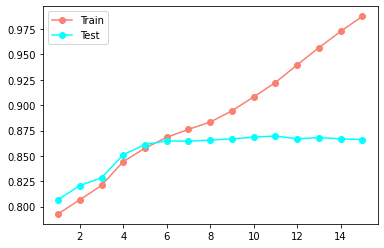

In [54]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train', color = 'salmon')
plt.plot(values, test_scores, '-o', label='Test', color = 'cyan')
plt.legend()
plt.show()

Dari evaluasi yang dilakukan, didapatkan bahwa model berpotensi overfitting pada kedalaman >6. Maka, untuk selanjutnya pada model akan diterapkan parameter max_depth = 6.

### Hyperparameter Tuning

Selain parameter kedalaman model (max_depth), lakukan hyperparameter tuning untuk mendapatkan parameter optimal lainnya agar akurasi model lebih baik.

In [55]:
#import library
#from scipy.stats import randint
#from sklearn.model_selection import RandomizedSearchCV

#creating the hyperparameter grid
#random_grid = {'max_features': ['auto', 'sqrt'],
              #'min_samples_leaf': randint(1, 11),
              #'min_samples_split': randint(2, 11),
              #'n_estimators': randint(100, 1001)}             

#instantiating Random Forest classifier
#rf1 = RandomForestClassifier()

#instantiating RandomizedSearchCV object
#rf1_cv = RandomizedSearchCV(rf1, random_grid, cv = 5, random_state = 1)

#rf1_cv.fit(x_train, y_train)

#print the tuned parameters and score
#print("Tuned Random Forest Parameters: {}".format(rf1_cv.best_params_))
#print("Best score is {}".format(rf1_cv.best_score_))

Tuned Random Forest Parameters: {'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 9, 'n_estimators': 419}
Best score is 0.8601333333333333


In [56]:
#fit Random Forest model after hyperparameter tuning
rf_model = RandomForestClassifier(max_depth = 6, max_features = 'sqrt', min_samples_leaf = 10,
                                  min_samples_split = 9, n_estimators = 419, random_state = 1)
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=10,
                       min_samples_split=9, n_estimators=419, random_state=1)

In [57]:
#accuracy checking on new Random Forest model
print('Training Accuracy: ', metrics.accuracy_score(y_train, rf_model.predict(x_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y_test, rf_model.predict(x_test))*100)

Training Accuracy:  86.34666666666668
Test Accuracy:  86.28


Setelah melakukan hyperparameter tuning, akurasi model menurun 13% pada dataset training dan 0.2% pada dataset test. Namun, dari hasil evaluasi maka model sudah tidak overfitting sehingga bisa diharapkan lebih baik performanya.

## KNN

In [58]:
#fit model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [59]:
#cek akurasi model antara data training dan data test untuk melihat apakah model overfitting
print('Training Accuracy: ', metrics.accuracy_score(y_train, knn.predict(x_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y_test, knn.predict(x_test))*100)

Training Accuracy:  86.33333333333333
Test Accuracy:  82.32000000000001


Dari cek akurasi model yang dilakukan terlihat perbedaan kecil antara model training dan model test. Masih bisa dianggap aman dari overfitting.

### Hyperparameter Tuning

Dengan melakukan hyperparameter tuning pada model ini diharapkan didapatkan parameter yang optimal untuk meningkatakan akurasi model dan mengurangi lagi tingkat perbedaan akurasinya antara dataset training dan dataset test.

In [60]:
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import cross_val_predict

In [61]:
k_range = range(1,10)
k_score = []

for k in k_range:
  knn1 = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn1,x,y,cv=20, scoring="accuracy")
  k_score.append(score.mean())

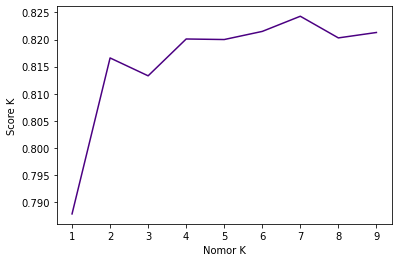

In [62]:
import matplotlib.pyplot as plt

plt.plot(k_range, k_score, color = 'indigo')
plt.xlabel("Nomor K")
plt.ylabel("Score K")
plt.show()

Dari hasil hyperparameter tuning, didapatkan parameter terbaik untuk model yaitu n_neighbors = 7. Dan karena jumlah data adalah 10000 yaitu genap, maka benar baiknya menggunakan n_neighbors yang bernilai ganjil.

In [63]:
#fit model KNN after hyperparameter tuning
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [64]:
#accuracy checking on new KNN model
print('Training Accuracy: ', metrics.accuracy_score(y_train, knn_model.predict(x_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y_test, knn_model.predict(x_test))*100)

Training Accuracy:  85.2
Test Accuracy:  83.12


Setelah pada model diterapkan parameter baru, nilai akurasi berubah pada dataset training menurun 1.3% namun meningkat pada dataset test sekitar 0.9%. Berarti terjadi perbaikan performa model walaupun tidak signifikan.

## Decision Tree

In [65]:
#fit model Decision Tree
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [66]:
#cek akurasi model antara data training dan data test untuk melihat apakah model overfitting
print('Training Accuracy: ', metrics.accuracy_score(y_train, knn.predict(x_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y_test, knn.predict(x_test))*100)

Training Accuracy:  86.33333333333333
Test Accuracy:  82.32000000000001


Tes akurasi pada model sudah terlihat baik, namun masih ada perbedaan kecil yang muungkin berpotensi ke overfitting (karena model Decision Tree rawan mengalami overfitting).

### Evaluate Overfitting

In [67]:
#Evaluate Overfitting
values = [i for i in range(1,11)]
train_scores = []
test_scores = []

In [68]:
#evaluate a decision tree for each depth
for i in values:
	#configure the model
	tree = DecisionTreeClassifier(max_depth=i)
	#fit model on the training dataset
	tree.fit(x_train, y_train)
	#evaluate on the train dataset
	train_yhat = tree.predict(x_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	#evaluate on the test dataset
	test_yhat = tree.predict(x_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	#summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.793, test: 0.807
>2, train: 0.827, test: 0.835
>3, train: 0.838, test: 0.846
>4, train: 0.849, test: 0.857
>5, train: 0.857, test: 0.857
>6, train: 0.868, test: 0.862
>7, train: 0.873, test: 0.858
>8, train: 0.882, test: 0.858
>9, train: 0.895, test: 0.848
>10, train: 0.909, test: 0.840


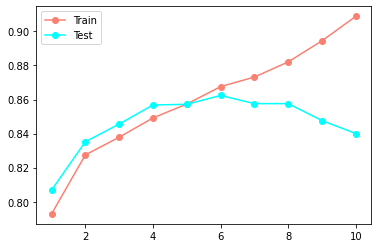

In [69]:
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train', color = 'salmon')
plt.plot(values, test_scores, '-o', label='Test', color = 'cyan')
plt.legend()
plt.show()

Evaluasi model terhadap potensi overfitting pada model menunjukkan bahwa model akan cenderung overfitting di kedalaman max_depth > 5. Maka selanjutnya pada model akan diterapkan paramater tersebut dengan nilai optimalnya.

#Hyperparameter Tuning

Selain parameter max_depth (kedalaman), perlu menemukan parameter lain dengan nilai optimal agar model menghasilkan akurasi yang lebih baik.

In [70]:
#import library
#from scipy.stats import randint
#from sklearn.model_selection import RandomizedSearchCV

#creating the hyperparameter grid
#param_dist = {'max_features': randint(1, 9),
              #'min_samples_leaf': randint(1, 9),
              #'criterion': ['gini', 'entropy']}
              
#instantiating Decision Tree classifier
#tree1 = DecisionTreeClassifier()

#instantiating RandomizedSearchCV object
#tree1_cv = RandomizedSearchCV(tree1, param_dist, cv = 5, random_state = 0)

#tree1_cv.fit(x_train, y_train)

#print the tuned parameters and score
#print("Tuned Decision Tree Parameters: {}".format(tree1_cv.best_params_))
#print("Best score is {}".format(tree1_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_features': 8, 'min_samples_leaf': 6}
Best score is 0.8296000000000001


In [71]:
#fit model KNN after hyperparameter tunin
tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, max_features = 8, min_samples_leaf = 6)
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=8, min_samples_leaf=6)

In [72]:
#accuracy checking on new Decision Tree model
print('Training Accuracy: ', metrics.accuracy_score(y_train, tree_model.predict(x_train))*100)
print('Test Accuracy: ', metrics.accuracy_score(y_test, tree_model.predict(x_test))*100)

Training Accuracy:  85.39999999999999
Test Accuracy:  85.72


Model dengan parameter baru menghasilkan nilai akurasi yang berbeda, yaitu pada dataset training menurun sekitar 2.8% dan pada dataset test meningkat sekitar 2.6%. Walaupun tidak signifikan, performa model menjadi lebih membaik.

# Evaluasi Model

Accuracy - seberapa akurat model (prediksi yang benar dari semua data)

Precision - seberapa baik prediksi label positif dari model

Recall - seberapa baik kualitas model dalam memprediksi data yang positif

F1-Score - harmonic mean (representatif) dari Precision dan Recall

ROC-AUC - seberapa yakin model dalam prediksinya

Note: kelas positif >> customer churn

Binary Classification: 
- kelas 1
- kelas 0

Memprediksi Probabilitas

Threshold:
- probabilitas menjadi kelas 1 di atas 50%, maka label 1
- probabilitas menjadi kelas 1 di bawah 50%, maka label 0

Evaluasi model yang dilakukan adalah menggunakan model setelah dilakukan hyperparameter tuning.

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

## Logistic Regression

In [75]:
print('Logistic Regression')
y_pred = log_model.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1-Score: {:.2f}'.format(f1_score(y_test, y_pred)))

y_pred_proba = log_model.predict_proba(x_test)[::,-1]
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

Logistic Regression
Accuracy: 0.82
Precision: 0.59
Recall: 0.21
F1-Score: 0.31
ROC-AUC: 0.77


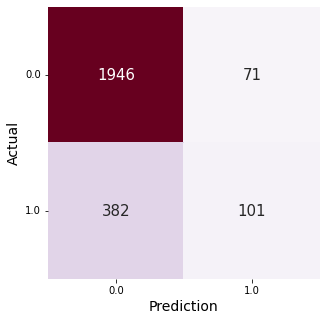

In [76]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 5))
labels = unique_rows = np.unique(y_test, axis=0)
sns.heatmap(cm, annot=True, square=True, cmap='PuRd', cbar=False, xticklabels=labels, 
            yticklabels=labels, fmt="d", annot_kws={"fontsize": 15})
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.yticks(rotation=0, verticalalignment='center');

## Support Vector Classifier (SVC)

In [77]:
print('SVC')
y_pred = svc_model.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1-Score: {:.2f}'.format(f1_score(y_test, y_pred)))

y_pred_proba = svc_model.predict_proba(x_test)[::,-1]
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

SVC
Accuracy: 0.86
Precision: 0.80
Recall: 0.37
F1-Score: 0.51
ROC-AUC: 0.81


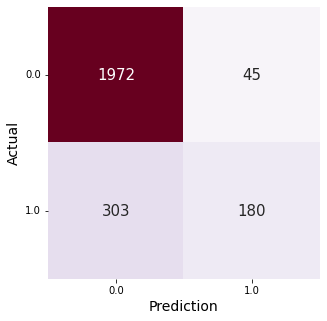

In [78]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 5))
labels = unique_rows = np.unique(y_test, axis=0)
sns.heatmap(cm, annot=True, square=True, cmap='PuRd', cbar=False, xticklabels=labels, 
            yticklabels=labels, fmt="d", annot_kws={"fontsize": 15})
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.yticks(rotation=0, verticalalignment='center');

## Random Forest

In [79]:
print('Random Forest')
y_pred = rf_model.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1-Score: {:.2f}'.format(f1_score(y_test, y_pred)))

y_pred_proba = rf_model.predict_proba(x_test)[::,-1]
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

Random Forest
Accuracy: 0.86
Precision: 0.81
Recall: 0.38
F1-Score: 0.52
ROC-AUC: 0.85


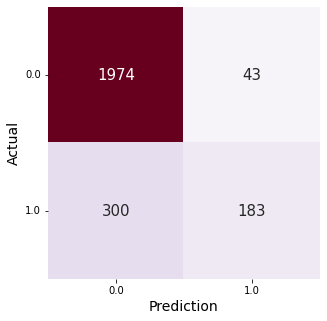

In [80]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 5))
labels = unique_rows = np.unique(y_test, axis=0)
sns.heatmap(cm, annot=True, square=True, cmap='PuRd', cbar=False, xticklabels=labels, 
            yticklabels=labels, fmt="d", annot_kws={"fontsize": 15})
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.yticks(rotation=0, verticalalignment='center');

## KNN

In [81]:
print('KNN')
y_pred = knn_model.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1-Score: {:.2f}'.format(f1_score(y_test, y_pred)))

y_pred_proba = knn_model.predict_proba(x_test)[::,-1]
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

KNN
Accuracy: 0.83
Precision: 0.64
Recall: 0.29
F1-Score: 0.40
ROC-AUC: 0.77


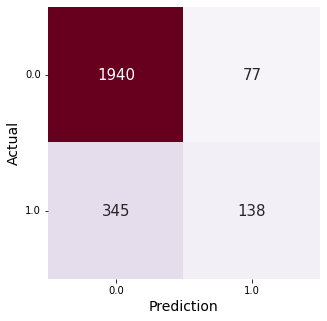

In [82]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 5))
labels = unique_rows = np.unique(y_test, axis=0)
sns.heatmap(cm, annot=True, square=True, cmap='PuRd', cbar=False, xticklabels=labels, 
            yticklabels=labels, fmt="d", annot_kws={"fontsize": 15})
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.yticks(rotation=0, verticalalignment='center');

## Decision Tree

In [83]:
print('Decision Tree')
y_pred = tree_model.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1-Score: {:.2f}'.format(f1_score(y_test, y_pred)))

y_pred_proba = tree_model.predict_proba(x_test)[::,-1]
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

Decision Tree
Accuracy: 0.86
Precision: 0.74
Recall: 0.41
F1-Score: 0.52
ROC-AUC: 0.79


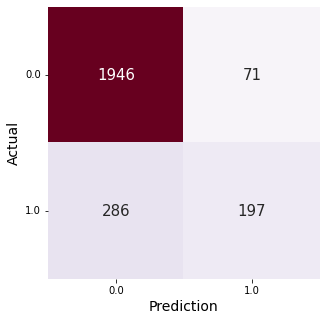

In [84]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 5))
labels = unique_rows = np.unique(y_test, axis=0)
sns.heatmap(cm, annot=True, square=True, cmap='PuRd', cbar=False, xticklabels=labels, 
            yticklabels=labels, fmt="d", annot_kws={"fontsize": 15})
plt.xlabel('Prediction', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.yticks(rotation=0, verticalalignment='center');

Model yang diujikan yaitu Logistic Regression, SVC (Support Vector Classifier), Random Forest, KNN dan Decision Tree. Dari setiap model telah dilakukan evaluasi performanya dalam melakukan prediksi. 

Setelah dibandingkan, didapatkan bahwa model SVC, Random Forest dan Decision Tree memiliki skor akurasi yang sama yaitu 0.86. Oleh karena itu, perlu melihat skor lain yaitu presisi. Dalam hal presisi, model Random Forest terlihat lebih baik yaitu dengan skor 0.82, sedangkan model SVC hanya 0.80 dan Decision Tree hanya 0.74.

Aspek penting lainnya yang perlu diperhatikan adalah skor ROC-AUC yang mana memperlihatkan seberapa yakin model dalam memprediksi. Berdasarkan hal tersebut, dapat dipastikan bahwa model Random Forest menjadi model terbaik pada prediksi churn ini karena memiliki skor ROC-AUC 0.85 sedangkan model SVC hanya 0.81 dan Decision Tree di skor 0.79.

Maka, selanjutnya model yang dipakai adalah **Random Forest**.

## Resampling (SMOTE)

In [85]:
y_train.value_counts()

0.0    5946
1.0    1554
Name: Exited, dtype: int64

In [86]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_train, y_train)
print(x_smote.shape)
print(y_smote.shape)
print(y_smote.value_counts())

(11892, 16)
(11892,)
0.0    5946
1.0    5946
Name: Exited, dtype: int64


In [87]:
#mengaplikasaikan data hasil smote terhadap model terbaik yang didapatkan
rf_smote = RandomForestClassifier(max_depth = 6, max_features = 'sqrt', min_samples_leaf = 9,
                                  min_samples_split = 7, n_estimators = 861, random_state = 1)
rf_smote.fit(x_smote, y_smote)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=9,
                       min_samples_split=7, n_estimators=861, random_state=1)

In [88]:
print('Random Forest (SMOTE)')
y_pred = rf_smote.predict(x_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1-Score: {:.2f}'.format(f1_score(y_test, y_pred)))

y_pred_proba = rf_smote.predict_proba(x_test)[::,-1]
print('ROC-AUC: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

Random Forest (SMOTE)
Accuracy: 0.79
Precision: 0.47
Recall: 0.68
F1-Score: 0.56
ROC-AUC: 0.84


Setelah dicoba untuk melakukan resampling terhadap data imbalance pada fitur target yaitu metode SMOTE, kemudian dengan dataset tersebut dilakukan modeling menggunakan model terbaik yang didapatkan yaitu Random Forest. Namun, setelah dievaluasi, model dengan data resampling justru kualitasnya menurun (akurasi dan presisi menurun). Maka untuk model tetap akan menggunakan dataset yang asli, bukan data hasil resampling.

# Feature Importance

Merupakan fungsi untuk melihat seberapa penting suatu fitur berperan dalam modeling klasifikasi. Sehingga dapat dieliminasi fitur yang kurang berperan penting saat melakukan re-modeling untuk selanjutnya di-deploy.

In [89]:
x_train.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'CreditScoreGivenAge',
       'TenureByAge', 'BalanceSalaryRatio', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male'],
      dtype='object')

In [90]:
rf_model.feature_importances_

array([0.02322493, 0.30497541, 0.00578982, 0.04003682, 0.28149971,
       0.00128773, 0.08462368, 0.01151951, 0.12664667, 0.01863796,
       0.02711564, 0.00667551, 0.04911984, 0.00375825, 0.00721118,
       0.00787734])

In [91]:
df_fi = pd.DataFrame(zip(x_train.columns, rf_model.feature_importances_), columns = ['Feature', 'Importance'])
df_fi.sort_values(by='Importance', ascending = False )

,Feature,Importance
1,Age,0.304975
4,NumOfProducts,0.281500
8,CreditScoreGivenAge,0.126647
6,IsActiveMember,0.084624
12,Geography_Germany,0.049120
3,Balance,0.040037
10,BalanceSalaryRatio,0.027116
0,CreditScore,0.023225
9,TenureByAge,0.018638
7,EstimatedSalary,0.011520


Dari hasil Feature Importance didapatkan tingakatan fitur seberapa berpengaruh terhadap hasil prediksi. Apabila melakukan re-modeling, fitur dengan tingkat pengaruh yang kecil dapat dihapus agar model lebih akurat.

# Result

Dari model terbaik yang didapatkan, dapat diterapkan ke dataset test atau ke dataset real (dalam hal ini menggunakan dataset test) untuk melakukan prediksi sesuai dengan model yang dibuat. Dan pada dataset dapat ditambahkan fitur yang menunjukkan hasil prediksi: churn (label 1) atau tidak churn (label 0). Selain itu dapat pula ditambahkan fitur berupa nilai probabilitas churn dari nasabah.

In [92]:
y_pred = rf_model.predict(x_test)
y_pred_proba = rf_model.predict_proba(x_test)[::,-1]
x_result = dff.iloc[x_test.index,:].copy()
x_result['ProbaExited'] = y_pred_proba
x_result['PredictedExited'] = y_pred

Berikut dari model, didapatkan daftar nasabah yang diprediksi churn dengan tingkat probabilitasnya masing-masing. Sehingga, dengan data ini pihak bank dapat menentukan kepada nasabah mana dan tindakan seperti apa yang dilakukan agar nasabah tidak churn.

In [93]:
x_result[(x_result['PredictedExited'] == 1)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreGivenAge,TenureByAge,BalanceSalaryRatio,ProbaExited,PredictedExited
2351,651,France,Male,35,7,74623.50,3,1,0,129451.29,1,18.600000,0.200000,0.576460,0.598838,1.0
5704,732,Germany,Female,45,6,98792.40,1,1,0,81491.70,1,16.266667,0.133333,1.212300,0.616505,1.0
3930,622,Germany,Female,52,9,111973.97,1,1,1,162756.29,1,11.961538,0.173077,0.687986,0.513370,1.0
1318,598,France,Female,43,5,0.00,3,1,1,100722.72,1,13.906977,0.116279,0.000000,0.681355,1.0
544,504,France,Female,49,7,0.00,3,0,1,87822.14,1,10.285714,0.142857,0.000000,0.695323,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1,11.264151,0.075472,1.273785,0.643887,1.0
5683,615,France,Female,61,1,104267.70,1,1,0,62845.64,1,10.081967,0.016393,1.659108,0.662105,1.0
5105,671,Germany,Male,51,3,96891.46,1,1,0,176403.33,1,13.156863,0.058824,0.549261,0.697665,1.0
6775,469,France,Female,48,5,0.00,1,1,0,160529.71,1,9.770833,0.104167,0.000000,0.596440,1.0


In [94]:
#apabila ingin memfilter nasabah yang diprediksi churn dengan tingkat probabilitas di atas 0.9 (agar lebih fokus terhadap yang probabilitasnya tinggi)
#x_result[(x_result['PredictedExited'] == 1) & (x_result['ProbaExited'] >= 0.9)]

In [95]:
x_result[(x_result['PredictedExited'] == 1)].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScoreGivenAge,TenureByAge,BalanceSalaryRatio,ProbaExited,PredictedExited
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.0
mean,632.261062,50.358407,4.849558,94727.938363,1.792035,0.747788,0.176991,106606.428496,0.809735,12.907565,0.098557,9.649792,0.644402,1.0
std,93.008329,7.677954,2.995467,57758.985418,1.035429,0.435247,0.382508,59084.227609,0.393382,3.102432,0.062541,91.364143,0.100437,0.0
min,358.000000,25.000000,0.000000,0.000000,1.000000,0.000000,0.000000,91.750000,0.000000,6.884615,0.000000,0.000000,0.501678,1.0
25%,576.750000,46.000000,2.000000,64205.247500,1.000000,0.250000,0.000000,61077.567500,1.000000,10.944051,0.045719,0.486150,0.565752,1.0
50%,636.000000,50.000000,5.000000,114231.145000,1.000000,1.000000,0.000000,107468.665000,1.000000,12.685020,0.087923,0.875729,0.626372,1.0
75%,690.500000,55.000000,8.000000,132579.235000,3.000000,1.000000,0.000000,159393.775000,1.000000,14.457143,0.144410,1.576452,0.695295,1.0
max,850.000000,70.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,198874.520000,1.000000,26.032258,0.250000,1326.102779,0.897021,1.0
